# Linear Regression Model For AutoMobile Price Prediction.

### Objective : To develop a linear regression model that accurately predicts the price of an automobile based on its features.

### Importing modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

### Defination of Attributes

In [2]:
Metadata = pd.read_excel(r"D:\PYTHON\Linear Regression\Automobile.xlsx",sheet_name='Metadata')

In [3]:
Metadata

,Column Name,Description
0,make,Manufacturer/brand of the vehicle
1,fuel_type,Type of fuel the vehicle uses
2,aspiration,Type of induction system
3,number_of_doors,Number of doors vehicle has.
4,body_style,Vehicle body type
5,drive_wheels,Type of drive system
6,engine_location,Location of the engine
7,wheel_base,Distance between front & rear axles.
8,length,Total vehicle length
9,width,Total vehicle width


### Extracting data from excel file

In [4]:
data = pd.read_excel(r"D:\PYTHON\Linear Regression\Automobile.xlsx")

In [5]:
# Taking the backup of dataframe
df = data.copy()

In [6]:
data.head()

,make,fuel_type,aspiration,number_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,number_of_cylinders,engine_size,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,four,130,111,5000,21,27,13495
1,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,four,130,111,5000,21,27,16500
2,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,six,152,154,5000,19,26,16500
3,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,four,109,102,5500,24,30,13950
4,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,five,136,115,5500,18,22,17450


### Checking for missing values.

In [7]:
df.isnull().sum()

make                   0
fuel_type              0
aspiration             0
number_of_doors        0
body_style             0
drive_wheels           0
engine_location        0
wheel_base             0
length                 0
width                  0
height                 0
curb_weight            0
number_of_cylinders    0
engine_size            0
horsepower             0
peak_rpm               0
city_mpg               0
highway_mpg            0
price                  0
dtype: int64

#### Data is complete without any null rows.

### Checking for Duplication

In [8]:
df[df.duplicated()]

,make,fuel_type,aspiration,number_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,number_of_cylinders,engine_size,horsepower,peak_rpm,city_mpg,highway_mpg,price


#### There are no duplicate rows.

###  Checking for Inconsistency in all the fields.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   make                 201 non-null    object 
 1   fuel_type            201 non-null    object 
 2   aspiration           201 non-null    object 
 3   number_of_doors      201 non-null    object 
 4   body_style           201 non-null    object 
 5   drive_wheels         201 non-null    object 
 6   engine_location      201 non-null    object 
 7   wheel_base           201 non-null    float64
 8   length               201 non-null    float64
 9   width                201 non-null    float64
 10  height               201 non-null    float64
 11  curb_weight          201 non-null    int64  
 12  number_of_cylinders  201 non-null    object 
 13  engine_size          201 non-null    int64  
 14  horsepower           201 non-null    int64  
 15  peak_rpm             201 non-null    int

In [10]:
cat = df.select_dtypes('object').columns

for x in cat:
    print(f'{x} : {df[x].unique()} ')

make : ['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'mercedes-benz' 'mercury' 'mitsubishi' 'nissan' 'peugot'
 'plymouth' 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen'
 'volvo'] 
fuel_type : ['gas' 'diesel'] 
aspiration : ['std' 'turbo'] 
number_of_doors : ['two' 'four'] 
body_style : ['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop'] 
drive_wheels : ['rwd' 'fwd' '4wd'] 
engine_location : ['front' 'rear'] 
number_of_cylinders : ['four' 'six' 'five' 'three' 'twelve' 'two' 'eight'] 


#### From above analysis it is clear that there is no inconsistency in the datatype and Nomenclature (all the categories are named in a consistent manner).

### Encoding 

#### Encoding all of the categorical field using OneHot Encoder as none of them have a hierarchical order.

In [11]:
for x in cat:
    df = pd.get_dummies(data=df,columns=[x])

In [12]:
df.head(2)

,wheel_base,length,width,height,curb_weight,engine_size,horsepower,peak_rpm,city_mpg,highway_mpg,...,drive_wheels_rwd,engine_location_front,engine_location_rear,number_of_cylinders_eight,number_of_cylinders_five,number_of_cylinders_four,number_of_cylinders_six,number_of_cylinders_three,number_of_cylinders_twelve,number_of_cylinders_two
0,88.6,168.8,64.1,48.8,2548,130,111,5000,21,27,...,1,1,0,0,0,1,0,0,0,0
1,88.6,168.8,64.1,48.8,2548,130,111,5000,21,27,...,1,1,0,0,0,1,0,0,0,0


In [13]:
df.columns

Index(['wheel_base', 'length', 'width', 'height', 'curb_weight', 'engine_size',
       'horsepower', 'peak_rpm', 'city_mpg', 'highway_mpg', 'price',
       'make_alfa-romero', 'make_audi', 'make_bmw', 'make_chevrolet',
       'make_dodge', 'make_honda', 'make_isuzu', 'make_jaguar', 'make_mazda',
       'make_mercedes-benz', 'make_mercury', 'make_mitsubishi', 'make_nissan',
       'make_peugot', 'make_plymouth', 'make_porsche', 'make_renault',
       'make_saab', 'make_subaru', 'make_toyota', 'make_volkswagen',
       'make_volvo', 'fuel_type_diesel', 'fuel_type_gas', 'aspiration_std',
       'aspiration_turbo', 'number_of_doors_four', 'number_of_doors_two',
       'body_style_convertible', 'body_style_hardtop', 'body_style_hatchback',
       'body_style_sedan', 'body_style_wagon', 'drive_wheels_4wd',
       'drive_wheels_fwd', 'drive_wheels_rwd', 'engine_location_front',
       'engine_location_rear', 'number_of_cylinders_eight',
       'number_of_cylinders_five', 'number_of_cylinders_

### Correlation Matrix

#### Variable with moderate to strong correlation with dependent variable.

In [14]:
correlation = df
cor = correlation.corr()
cor[(cor['price'] > 0.5) | (cor['price'] < -0.5)][['price']]

,price
wheel_base,0.584642
length,0.690628
width,0.751265
curb_weight,0.834415
engine_size,0.872335
horsepower,0.810795
city_mpg,-0.686571
highway_mpg,-0.704692
price,1.000000
make_mercedes-benz,0.524953


#### Among all the variables, curb_weight, engine_size and horsepower show a strong positive correlation with price. This indicates that as the values of these variables increase, the automobile price also tends to increase.

### Evaluating the range of numeric columns 

In [15]:
for x in df.select_dtypes(['int', 'float']).columns:
    min_val = df[x].min()
    max_val = df[x].max()
    range_val = int(max_val - min_val)
    print(f'{x} - Min {min_val} : Max {max_val} : Range {range_val}')


wheel_base - Min 86.6 : Max 120.9 : Range 34
length - Min 141.1 : Max 208.1 : Range 67
width - Min 60.3 : Max 72.0 : Range 11
height - Min 47.8 : Max 59.8 : Range 12
curb_weight - Min 1488 : Max 4066 : Range 2578
engine_size - Min 61 : Max 326 : Range 265
horsepower - Min 48 : Max 262 : Range 214
peak_rpm - Min 4150 : Max 6600 : Range 2450
city_mpg - Min 13 : Max 49 : Range 36
highway_mpg - Min 16 : Max 54 : Range 38
price - Min 5118 : Max 45400 : Range 40282


#### Since some columns, such as curb_weight and peak_rpm, have a very large range of values, it is better to normalize to bring all features onto a comparable scale, which ensures stable and efficient model training.

### Normalization using MinMaxScaler.

#### Splitting the dataset into x and y 

In [16]:
x = df.drop(['price'],axis=1)

In [17]:
y= df.price

#### Normalizing

In [18]:
x_columns = x.columns
mm = MinMaxScaler()
x_array = mm.fit_transform(x)
x = pd.DataFrame(x_array, columns=x_columns).round(2)

In [19]:
x.head()

,wheel_base,length,width,height,curb_weight,engine_size,horsepower,peak_rpm,city_mpg,highway_mpg,...,drive_wheels_rwd,engine_location_front,engine_location_rear,number_of_cylinders_eight,number_of_cylinders_five,number_of_cylinders_four,number_of_cylinders_six,number_of_cylinders_three,number_of_cylinders_twelve,number_of_cylinders_two
0,0.06,0.41,0.32,0.08,0.41,0.26,0.29,0.35,0.22,0.29,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.06,0.41,0.32,0.08,0.41,0.26,0.29,0.35,0.22,0.29,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.23,0.45,0.44,0.38,0.52,0.34,0.50,0.35,0.17,0.26,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.38,0.53,0.50,0.54,0.33,0.18,0.25,0.55,0.31,0.37,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.37,0.53,0.52,0.54,0.52,0.28,0.31,0.55,0.14,0.16,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


### Splitting the data into Test and Train.

In [20]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.3, random_state = 1)

In [21]:
x_train.head(2)

,wheel_base,length,width,height,curb_weight,engine_size,horsepower,peak_rpm,city_mpg,highway_mpg,...,drive_wheels_rwd,engine_location_front,engine_location_rear,number_of_cylinders_eight,number_of_cylinders_five,number_of_cylinders_four,number_of_cylinders_six,number_of_cylinders_three,number_of_cylinders_twelve,number_of_cylinders_two
69,0.29,0.59,0.87,0.25,0.85,0.65,0.5,0.24,0.08,0.05,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
90,0.23,0.43,0.30,0.48,0.21,0.14,0.1,0.43,0.50,0.55,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [22]:
y_train.head(2)

69    35056
90     7349
Name: price, dtype: int64

### Building the model.

In [23]:
lr = LinearRegression()

#### Fitting the model

In [24]:
lr.fit(x_train,y_train)

LinearRegression()

#### Getting Intercept and Coefficients from the model

In [25]:
intercept = lr.intercept_
intercept

5099.105753024309

In [26]:
coe = lr.coef_
coe
col = x_train.columns

coe_values = {}

for x,y in zip(col,coe):
    coe_values[x] = y.round(2)
coe_values

{'wheel_base': 6843.37,
 'length': -6232.56,
 'width': 6599.33,
 'height': -1992.98,
 'curb_weight': 6273.09,
 'engine_size': 21712.88,
 'horsepower': 6125.26,
 'peak_rpm': 3914.74,
 'city_mpg': -3792.05,
 'highway_mpg': 7962.11,
 'make_alfa-romero': 1283.62,
 'make_audi': 1778.52,
 'make_bmw': 8839.65,
 'make_chevrolet': 665.42,
 'make_dodge': -2874.89,
 'make_honda': -3054.02,
 'make_isuzu': -60.52,
 'make_jaguar': 6004.8,
 'make_mazda': 6.85,
 'make_mercedes-benz': 4161.28,
 'make_mercury': -1963.34,
 'make_mitsubishi': -3849.3,
 'make_nissan': -2333.46,
 'make_peugot': -1973.51,
 'make_plymouth': -3060.21,
 'make_porsche': 4113.4,
 'make_renault': -4272.9,
 'make_saab': 1624.61,
 'make_subaru': -2176.27,
 'make_toyota': -1591.53,
 'make_volkswagen': -1388.4,
 'make_volvo': 120.2,
 'fuel_type_diesel': 236.11,
 'fuel_type_gas': -236.11,
 'aspiration_std': -672.26,
 'aspiration_turbo': 672.26,
 'number_of_doors_four': -128.33,
 'number_of_doors_two': 128.33,
 'body_style_convertible':

#### Prediction 

In [27]:
y_prediction = lr.predict(x_test)

#### Checking R square values and Accuracy of the model

In [28]:
lr.score(x_train, y_train) # R Square 

0.9648986520673207

In [29]:
lr.score(x_test, y_test) # Accuracy

0.9039292990274327

#### The model demonstrates a good fit, with a R² value of 0.96. This indicates that 96% of the variability in the target variable (price) is explained by the independent variables included in the model.

### Residual Plot

In [30]:
residual = pd.DataFrame({'y_actaul':y_test,"y_predicted":y_prediction})

In [31]:
residual['res'] = residual['y_actaul']  - residual['y_predicted']

Text(0, 0.5, 'Residual Points')

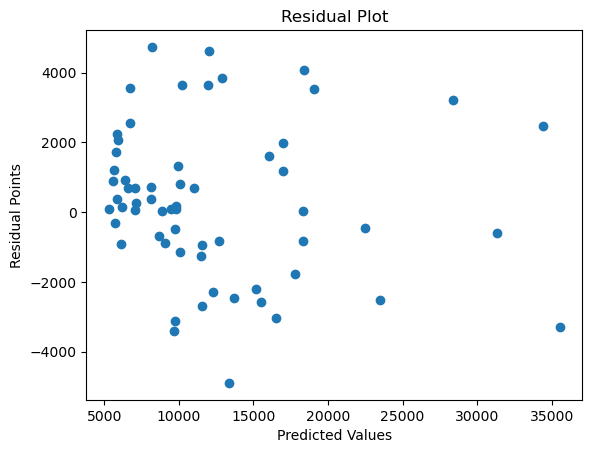

In [32]:
plt.scatter(residual['y_predicted'],residual['res'])
plt.title("Residual Plot")
plt.xlabel("Predicted Values")
plt.ylabel("Residual Points")

#### The residual plot shows points scattered randomly, without any pattern. This suggests that the model provides a good fit to the data.

### Creating the Equation to predict the price of an automobile for any scenario.

In [33]:
coe_values

{'wheel_base': 6843.37,
 'length': -6232.56,
 'width': 6599.33,
 'height': -1992.98,
 'curb_weight': 6273.09,
 'engine_size': 21712.88,
 'horsepower': 6125.26,
 'peak_rpm': 3914.74,
 'city_mpg': -3792.05,
 'highway_mpg': 7962.11,
 'make_alfa-romero': 1283.62,
 'make_audi': 1778.52,
 'make_bmw': 8839.65,
 'make_chevrolet': 665.42,
 'make_dodge': -2874.89,
 'make_honda': -3054.02,
 'make_isuzu': -60.52,
 'make_jaguar': 6004.8,
 'make_mazda': 6.85,
 'make_mercedes-benz': 4161.28,
 'make_mercury': -1963.34,
 'make_mitsubishi': -3849.3,
 'make_nissan': -2333.46,
 'make_peugot': -1973.51,
 'make_plymouth': -3060.21,
 'make_porsche': 4113.4,
 'make_renault': -4272.9,
 'make_saab': 1624.61,
 'make_subaru': -2176.27,
 'make_toyota': -1591.53,
 'make_volkswagen': -1388.4,
 'make_volvo': 120.2,
 'fuel_type_diesel': 236.11,
 'fuel_type_gas': -236.11,
 'aspiration_std': -672.26,
 'aspiration_turbo': 672.26,
 'number_of_doors_four': -128.33,
 'number_of_doors_two': 128.33,
 'body_style_convertible':

In [34]:
Prediction = intercept 
for x,y in coe_values.items():
    inp = float(input(f'{x} : '))
    Prediction = Prediction + y * inp
Prediction

wheel_base : 0.30
length : 0.48
width : 0.41
height : 0.57
curb_weight : 0.31
engine_size : 0.22
horsepower : 0.22
peak_rpm : 0.42
city_mpg : 0.38
highway_mpg : 0.47
make_alfa-romero : 0
make_audi : 0
make_bmw : 0
make_chevrolet : 0
make_dodge : 0
make_honda : 0
make_isuzu : 0
make_jaguar : 0
make_mazda : 0
make_mercedes-benz : 0
make_mercury : 0
make_mitsubishi : 0
make_nissan : 1
make_peugot : 0
make_plymouth : 0
make_porsche : 0
make_renault : 0
make_saab : 0
make_subaru : 0
make_toyota : 0
make_volkswagen : 0
make_volvo : 0
fuel_type_diesel : 0
fuel_type_gas : 1
aspiration_std : 1
aspiration_turbo : 0
number_of_doors_four : 1
number_of_doors_two : 0
body_style_convertible : 0
body_style_hardtop : 0
body_style_hatchback : 0
body_style_sedan : 1
body_style_wagon : 0
drive_wheels_4wd : 0
drive_wheels_fwd : 1
drive_wheels_rwd : 0
engine_location_front : 1
engine_location_rear : 0
number_of_cylinders_eight : 0
number_of_cylinders_five : 0
number_of_cylinders_four : 1
number_of_cylinders

9216.966853024309

# Thank you